In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pysparkling import *
import seaborn as sns

app_name = 'viz_scatter'
conf = SparkConf().setMaster("local[*]").setAppName(app_name)
sc = SparkContext(conf=conf)
ss = SparkSession.builder.getOrCreate()

In [3]:
df = ss.read.parquet('/Users/MrMndFkr/Desktop/2020-msds697-example/train')
df_train = df.toPandas()
df_train.head()

,BibNum,ItemCount,ItemCollection,PublicationYear,ItemType,ItemLocation,author_book_counts,publisher_book_counts,checkouts_l1m,checkouts_l2m,checkouts_l3m,checkouts_l6m,checkouts_l9m,checkouts_l12m,label
0,193435,1,caref,1969,arbk,cen,1,1,0,0,0,0,0,0,0
1,3035345,1,canf,2014,acbk,cen,2,1,0,0,0,0,1,1,0
2,3154601,4,nanf,2015,acbk,net,1,7,0,1,1,1,2,5,0
3,2341712,1,canf,2006,acbk,cen,1,7,0,0,0,0,0,0,1
4,3038071,3,nanf,2014,acbk,swt,3,7,0,0,2,4,5,10,0


### Pairplots

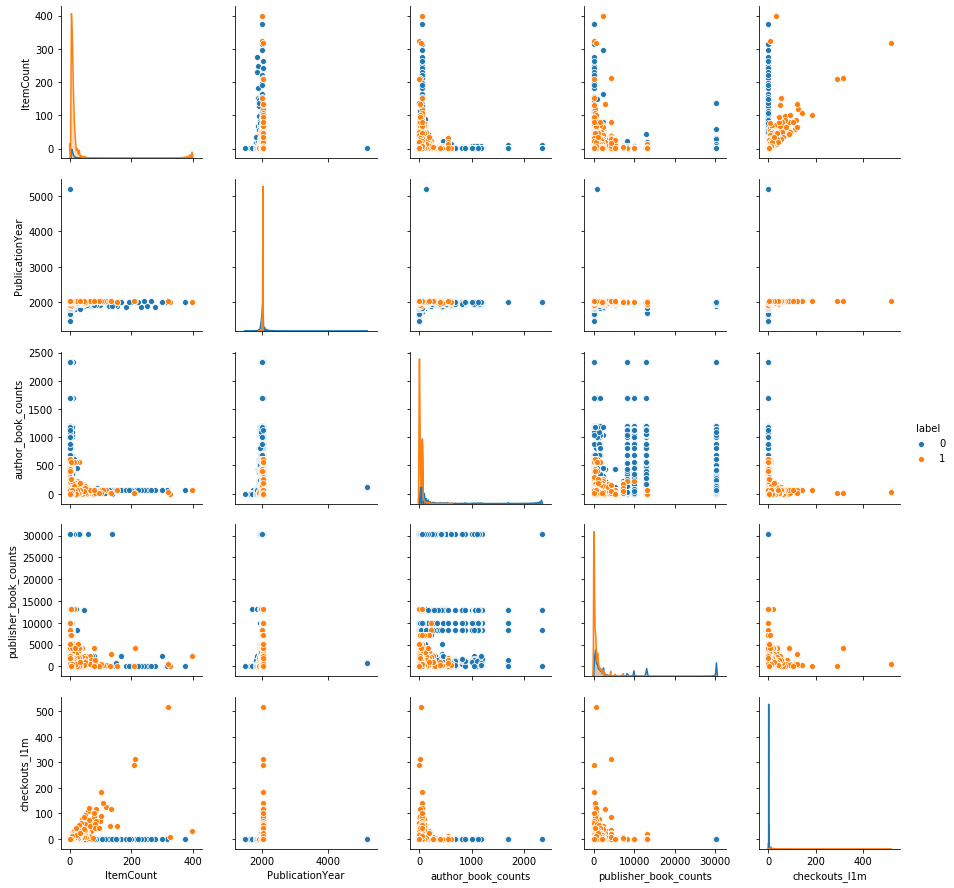

In [4]:
features = ['ItemCount','PublicationYear','author_book_counts','publisher_book_counts','checkouts_l1m']
sns.pairplot(df_train.sample(frac=0.1), x_vars=features, y_vars=features, hue='label')

### Heatmap

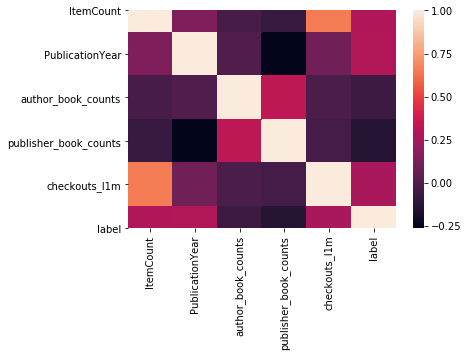

In [5]:
sns.heatmap(df_train.loc[:,['ItemCount','PublicationYear','author_book_counts','publisher_book_counts',
                           'checkouts_l1m','label']].sample(frac=0.001).corr())

### Graph for Model AUC ROC and AUC PR

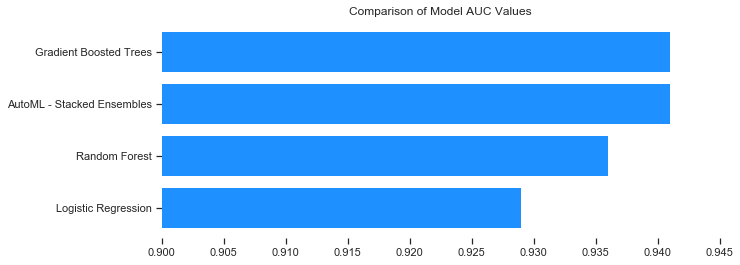

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
%matplotlib inline
df = pd.DataFrame({'model':['Logistic Regression',
                            'AutoML - Stacked Ensembles',
                            'Random Forest',
                            'Gradient Boosted Trees'],
                   'auc':[0.929, 0.941, 0.936, 0.941]})
df = df.sort_values(by='auc', ascending=True)
fig, ax = plt.subplots(figsize=(10,4))
ax.barh(df['model'], df['auc'], color='dodgerblue')
ax.set_title('Comparison of Model AUC Values');
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False);
ax.set_xlim(0.9, 0.945);

In [7]:
sc.stop()